# LSTM con una variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_train_2015.csv', index_col=0, parse_dates=True)
df = df.asfreq('h')

In [ ]:
df = df.between_time('08:00:00','17:00:00')

In [ ]:
df.head()

,DC,PAAVG1H,PAMAX1H,PAMIN1H,PRSUM1H,RHAVG1H,RHMAX1H,RHMIN1H,SRDIFAVG1H,SRDIFMAX1H,SRDIFMIN1H,SRDIFSUM1H,SRGLOAVG1H,SRGLOMAX1H,SRGLOMIN1H,SRGLOSUM1H,TAAVG1H,TAMAX1H,TAMIN1H,TS1AVG1H,TS1MAX1H,TS1MIN1H,TS2AVG1H,TS2MAX1H,TS2MIN1H,TS3AVG1H,TS3MAX1H,TS3MIN1H,TS4AVG1H,TS4MAX1H,TS4MIN1H,TS5AVG1H,TS5MAX1H,TS5MIN1H,TS6AVG1H,TS6MAX1H,TS6MIN1H,TS7AVG1H,TS7MAX1H,TS7MIN1H,WD1HA,WD1HX,WDGM,WGD1HX,WGDH,WR1H,WS1HA,WS1HM,WS1HX
Local_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 08:00:00,13.9,743.5,743.7,743.1,0.0,94,96,89,97.0,145.0,37.0,5836.0,107.0,162.0,40.0,6404.0,10.6,12.2,9.5,10.3,11.9,9.3,10.6,12.0,9.7,11.1,12.1,10.5,12.1,12.3,12.0,13.7,13.8,13.7,15.0,15.0,15.0,15.0,15.0,15.0,42,91,54,46.0,7.0,37.0,2.5,0.4,4.6
2015-01-01 09:00:00,15.0,743.8,743.9,743.7,0.0,84,89,76,224.0,514.0,120.0,13469.0,394.0,781.0,136.0,23646.0,13.5,15.1,12.2,13.2,14.9,11.9,13.1,14.4,12.0,12.8,13.6,12.1,12.6,12.9,12.3,13.7,13.7,13.7,15.0,15.0,15.0,15.0,15.0,15.0,59,111,42,69.0,8.0,49.0,3.3,0.0,5.8
2015-01-01 10:00:00,15.0,743.7,743.9,743.4,0.0,68,79,57,219.0,329.0,97.0,13163.0,728.0,1197.0,373.0,43654.0,16.3,18.1,15.1,17.2,19.7,14.9,16.4,18.5,14.4,14.8,16.1,13.6,13.3,13.8,12.9,13.7,13.7,13.7,15.0,15.0,15.0,15.0,15.0,15.0,40,175,41,28.0,9.0,66.0,4.4,0.0,8.4
2015-01-01 11:00:00,14.7,743.2,743.4,742.8,0.0,62,66,58,365.0,471.0,284.0,21929.0,428.0,667.0,303.0,25688.0,17.2,18.4,16.7,18.8,20.0,18.0,18.0,18.7,17.4,16.0,16.2,15.9,14.0,14.2,13.8,13.8,13.8,13.7,15.0,15.0,15.0,15.0,15.0,15.0,35,153,26,29.0,10.0,61.0,4.0,0.0,8.1
2015-01-01 12:00:00,14.8,742.6,742.9,742.3,0.0,60,65,55,371.0,678.0,166.0,22262.0,403.0,879.0,172.0,24204.0,17.7,18.5,17.2,18.1,18.6,17.4,17.5,17.9,17.1,16.0,16.3,15.9,14.4,14.5,14.2,13.9,13.9,13.8,15.0,15.0,15.0,15.0,15.0,15.0,34,162,40,7.0,11.0,54.0,3.5,0.0,7.6


In [ ]:
df = df[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMIN1H','RHMAX1H']]

In [ ]:
df.head()

,SRGLOAVG1H,TAMAX1H,TAMIN1H,WS1HX,WS1HA,RHMIN1H,RHMAX1H
Local_Time,,,,,,,
2015-01-01 08:00:00,107.0,12.2,9.5,4.6,2.5,89,96
2015-01-01 09:00:00,394.0,15.1,12.2,5.8,3.3,76,89
2015-01-01 10:00:00,728.0,18.1,15.1,8.4,4.4,57,79
2015-01-01 11:00:00,428.0,18.4,16.7,8.1,4.0,58,66
2015-01-01 12:00:00,403.0,18.5,17.2,7.6,3.5,55,65


In [ ]:
np.where(df=='/')

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
df_test = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_test_2015.csv', index_col=0, parse_dates=True)
df_test = df_test.asfreq('h')

In [ ]:
df_test = df_test[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMIN1H','RHMAX1H']]
df_test = df_test.between_time('08:00:00','17:00:00')

Se toma la serie de tiempo de la radiación solar global.

In [ ]:
RSG = df['SRGLOAVG1H'].values

In [ ]:
RSG = np.reshape(RSG,(-1,1))

In [ ]:
RSG[:5]

array([[107.],
       [394.],
       [728.],
       [428.],
       [403.]])

In [ ]:
RSG_test = df_test['SRGLOAVG1H'].values
RSG_test = np.reshape(RSG_test,(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(RSG)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(RSG)
scaled_test = scaler.transform(RSG_test)

In [ ]:
scaled_train[0]

array([0.07730673])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

Se definen los batches para el entrenamiento.

In [ ]:
n_input = 12 # horas hacia atrás
n_features = 0 # variables exógenas
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]

In [ ]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.07730673 0.31587697 0.59351621 0.34413965 0.32335827 0.57772236
 0.31837074 0.48212801 0.24438903 0.10141313 0.06899418 0.08645054]
Predicción: 
 [[0.17705736]]


## Creación del modelo

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features+1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10
2908/2908 [==============================] - 25s 8ms/step - loss: 0.0252
Epoch 2/10
2908/2908 [==============================] - 22s 8ms/step - loss: 0.0182
Epoch 3/10
2908/2908 [==============================] - 23s 8ms/step - loss: 0.0173
Epoch 4/10
2908/2908 [==============================] - 23s 8ms/step - loss: 0.0169
Epoch 5/10
2908/2908 [==============================] - 23s 8ms/step - loss: 0.0163
Epoch 6/10
2908/2908 [==============================] - 23s 8ms/step - loss: 0.0161
Epoch 7/10
2908/2908 [==============================] - 22s 8ms/step - loss: 0.0161
Epoch 8/10
2908/2908 [==============================] - 23s 8ms/step - loss: 0.0160
Epoch 9/10
2908/2908 [==============================] - 23s 8ms/step - loss: 0.0159
Epoch 10/10
2908/2908 [==============================] - 23s 8ms/step - loss: 0.0158


Se puede observar que con 10 épocas es más que suficiente. Quizá se puede reducir a 8 épocas para la comparación de las siguientes redes.

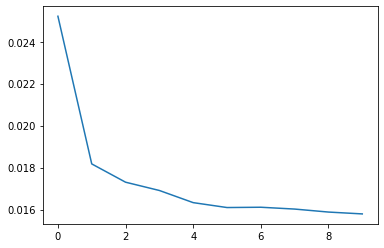

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
X.shape

(1, 12, 1)

In [ ]:
# Necesitaremos las últimas 12 horas del conjunto de entrenamiento para predecir la primera hora en el conjunto de prueba
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.35078969],
       [0.10224439],
       [0.06650042],
       [0.13466334],
       [0.14962594],
       [0.34413965],
       [0.46051538],
       [0.53782211],
       [0.36242727],
       [0.27847049],
       [0.14131338],
       [0.09143807]])

In [ ]:
first_eval_batch.shape

(12, 1)

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features+1))

In [ ]:
first_eval_batch.shape

(1, 12, 1)

Valor predicho y valor real.

In [ ]:
model.predict(first_eval_batch)[0]

array([0.08589282], dtype=float32)

In [ ]:
scaled_test[0]

array([0.17290108])

Se obtienen predicciones para una semana

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features+1))

for i in range(12*7):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
df_plot = pd.DataFrame()

In [ ]:
df_plot['RSG'] =  df_test['SRGLOAVG1H'][:12*7]

In [ ]:
df_plot['predictions'] = true_predictions

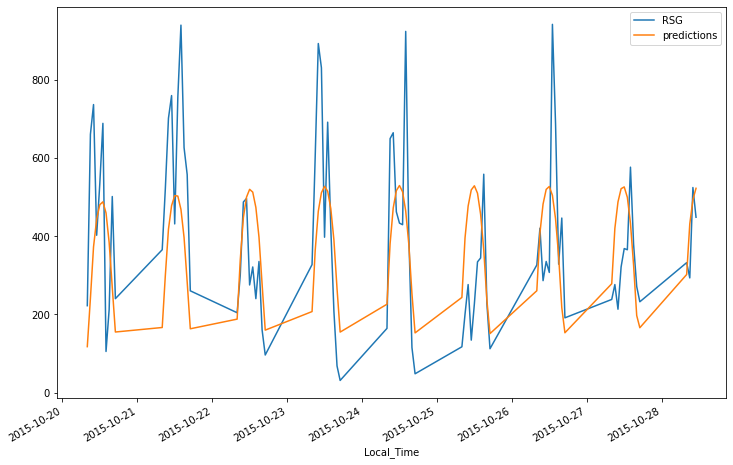

In [ ]:
df_plot.plot(figsize=(12,8))

Evaluación del modelo

In [ ]:
predictions = []

In [ ]:
for i in range(12,len(df_test)):
  model_input = scaled_test[i-12:i]
  model_input = model_input.reshape((1, n_input, n_features+1))
  predictions.append(model.predict(model_input)[0])

In [ ]:
predictions[:5]

[array([0.41258353], dtype=float32),
 array([0.47893292], dtype=float32),
 array([0.43803492], dtype=float32),
 array([0.25068438], dtype=float32),
 array([0.35563767], dtype=float32)]

In [ ]:
predictions = np.ndarray.flatten(np.array(predictions))

In [ ]:
len(predictions)

718

In [ ]:
len(df_test)

730

In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
true_predictions[:5]

array([[510.33798653],
       [590.15629929],
       [540.95601103],
       [315.57330978],
       [441.83211648]])

In [ ]:
true_values = np.ndarray.flatten(df_test.iloc[12:]['SRGLOAVG1H'].values)

In [ ]:
len(true_values)

718

In [ ]:
mean_squared_error(true_values,true_predictions)

24056.43082594629

Este modelo es mejor que AR.

In [ ]:
errorAR = 24345.459379778287
errorLSTM = 24056.43082594629
min(errorAR, errorLSTM)

24056.43082594629

## Búsqueda de los mejores parámetros para el modelo

**Número de neuronas LSTM**

In [ ]:
def create_Model(n_input, LSTM_neurons = 100):
  # define model
  model = Sequential()
  model.add(LSTM(LSTM_neurons, activation='relu', input_shape=(n_input, n_features+1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [ ]:
best_model = None
lowest_error = 58000

In [ ]:
n_input = 10 # horas hacia atrás
n_features = 0 # variables exógenas
generator = TimeseriesGenerator(scaled_train, scaled_train, length=i, batch_size=1) 

In [ ]:
for i in range(50,151,10): 
  model = create_Model(n_input,LSTM_neurons=i)
  print('Neuronas LSTM:',i)
  model.fit(generator,epochs=5,verbose=False)
  predictions = []
  for j in range(n_input,len(df_test)):
    model_input = scaled_test[j-n_input:j]
    model_input = model_input.reshape((1, n_input, n_features+1))
    predictions.append(model.predict(model_input)[0])
  predictions = np.ndarray.flatten(np.array(predictions))  
  true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
  true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
  error = mean_squared_error(true_values,true_predictions)
  print('Error:',error)
  if(error < lowest_error):
    best_model = model
    lowest_error = error
    print('Best:',i)

Neuronas LSTM: 50
Error: 27561.938321251204
Best: 50
Neuronas LSTM: 60
Error: 30509.633793668003
Neuronas LSTM: 70
Error: 28109.80405665486
Neuronas LSTM: 80
Error: 33585.5855254581
Neuronas LSTM: 90
Error: 25238.78108281933
Best: 90
Neuronas LSTM: 100
Error: 29094.403485878403
Neuronas LSTM: 110
Error: 26336.274160004396
Neuronas LSTM: 120
Error: 26069.20858572483
Neuronas LSTM: 130
Error: 28747.15769272012
Neuronas LSTM: 140
Error: 27149.928340286988
Neuronas LSTM: 150
Error: 29353.78430271814


El mejor modelo tiene 90 neuronas en su capa LSTM

In [ ]:
best_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 90)                33120     
                                                                 
 dense_28 (Dense)            (None, 1)                 91        
                                                                 
Total params: 33,211
Trainable params: 33,211
Non-trainable params: 0
_________________________________________________________________


**Mejor cantidad de horas pasadas**

In [ ]:
model = create_Model(12,50)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 50)                10400     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(1,21): #hasta dos días hacia el pasado
  n_input = i # horas hacia atrás
  n_features = 0 # variables exógenas
  generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)  
  model = create_Model(n_input,LSTM_neurons=90)
  print('Horas de retraso:',i)
  model.fit(generator,epochs=5,verbose=False)
  predictions = []
  for j in range(n_input,len(df_test)):
    model_input = scaled_test[j-n_input:j]
    model_input = model_input.reshape((1, n_input, n_features+1))
    predictions.append(model.predict(model_input)[0])
  predictions = np.ndarray.flatten(np.array(predictions))  
  true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
  true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
  error = mean_squared_error(true_values,true_predictions)
  print('Error:',error)
  if(error < lowest_error):
    best_model = model
    lowest_error = error
    print('Best:',i)

Horas de retraso: 1
Error: 33556.977229488606
Horas de retraso: 2
Error: 29064.598443984654
Horas de retraso: 3
Error: 29127.38636572857
Horas de retraso: 4
Error: 29627.39483182084
Horas de retraso: 5
Error: 28816.109997502186
Horas de retraso: 6
Error: 31759.922695595462
Horas de retraso: 7
Error: 29287.92296568974
Horas de retraso: 8
Error: 28123.83752226165
Horas de retraso: 9
Error: 26430.65088222642
Horas de retraso: 10
Error: 27107.258420761063
Horas de retraso: 11
Error: 28687.932810621027
Horas de retraso: 12
Error: 27758.863437482272
Horas de retraso: 13
Error: 24894.82345377392
Best: 13
Horas de retraso: 14
Error: 24571.895407418793
Best: 14
Horas de retraso: 15
Error: 25499.946583982317
Horas de retraso: 16
Error: 24867.459228035583
Horas de retraso: 17
Error: 24432.903408282305
Best: 17
Horas de retraso: 18
Error: 24246.164866847717
Best: 18
Horas de retraso: 19
Error: 25138.490165530508
Horas de retraso: 20
Error: 25490.98958511597


Es mejor tener 18 horas de retraso

**Batch size**

In [ ]:
best_model = None
lowest_error = 58000

In [ ]:
n_input = 18 # horas hacia atrás
n_features = 0 # variables exógenas
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)  

In [ ]:
for i in range(25,150,25): 
  model = create_Model(n_input,LSTM_neurons=90)
  print('Batch Size',i)
  model.fit(generator,epochs=5,verbose=False, batch_size=i)
  predictions = []
  for j in range(n_input,len(df_test)):
    model_input = scaled_test[j-n_input:j]
    model_input = model_input.reshape((1, n_input, n_features+1))
    predictions.append(model.predict(model_input)[0])
  predictions = np.ndarray.flatten(np.array(predictions))  
  true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
  true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
  error = mean_squared_error(true_values,true_predictions)
  print('Error:',error)
  if(error < lowest_error):
    best_model = model
    lowest_error = error
    print('Best:',i)

Batch Size 25
Error: 24366.655004987348
Best: 25
Batch Size 50
Error: 23729.19281905481
Best: 50
Batch Size 75
Error: 25112.35928363556
Batch Size 100
Error: 25680.46145055761
Batch Size 125
Error: 24853.29043488756


El mejor batch size es 50.

### Salvar el modelo

In [ ]:
best_model.save('RSG_model.h5')

In [ ]:
model = keras.models.load_model('/content/RSG_model.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 90)                33120     
                                                                 
 dense_2 (Dense)             (None, 1)                 91        
                                                                 
Total params: 33,211
Trainable params: 33,211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = []
for j in range(n_input,len(df_test)):
  model_input = scaled_test[j-n_input:j]
  model_input = model_input.reshape((1, n_input, n_features+1))
  predictions.append(model.predict(model_input)[0])
predictions = np.ndarray.flatten(np.array(predictions))

Es el error más pequeño que se ha logrado obtener

In [ ]:
true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
error = mean_squared_error(true_values,true_predictions)
print('Error:',error)

Error: 23729.19281905481


In [ ]:
df_plot = pd.DataFrame()

In [ ]:
df_plot['values'] = df_test.iloc[n_input:]['SRGLOAVG1H']

In [ ]:
df_plot['pred'] = true_predictions

In [ ]:
df_plot.head()

,values,pred
Local_Time,,
2015-10-21 16:00:00,557.0,326.761292
2015-10-21 17:00:00,260.0,421.014862
2015-10-22 08:00:00,204.0,268.164520
2015-10-22 09:00:00,300.0,388.294159
2015-10-22 10:00:00,487.0,490.981598


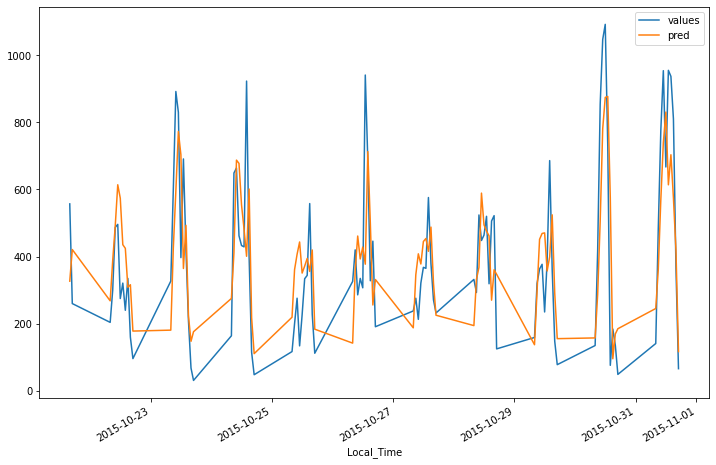

In [ ]:
df_plot['2015-10'].plot(figsize=(12,8))

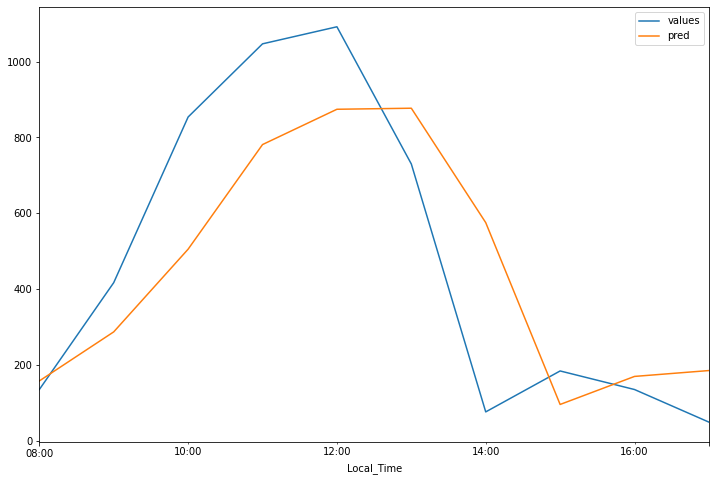

In [ ]:
df_plot['2015-10-30'].plot(figsize=(12,8))